## Домашнее задание

1. Загрузить выборку car.csv.
2. Провести анализ полученной выборки используя метрики описательной статистики.
3. Проверить баланс выборки (вывести график).
4. Проовести андерсэмплинг.
5. Провести оверсемплинг.
6. Сравнить полученные результаты.



## Простой случайный сэмплинг

Допустим, если вы хотите сделать выборку, где каждый элемент имеет равную вероятность быть выбранным.
Ниже мы выбираем 100 таких элементов из датасета.

In [1]:
import pandas as pd

data=pd.read_csv('../dataset/car.csv', delimiter=',').dropna()
X=data.iloc[:,:]
y=data['Engine Cylinders']
X

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [2]:
y

0        6.0
1        6.0
2        6.0
3        6.0
4        6.0
        ... 
11909    6.0
11910    6.0
11911    6.0
11912    6.0
11913    6.0
Name: Engine Cylinders, Length: 8084, dtype: float64

In [3]:
sample_df = data.sample(100)
sample_df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
136,BMW,3 Series,2015,premium unleaded (required),240.0,4.0,AUTOMATIC,all wheel drive,4.0,Luxury,Midsize,Sedan,33,22,3916,39500
10963,Toyota,Tundra,2015,flex-fuel (unleaded/E85),381.0,8.0,AUTOMATIC,four wheel drive,4.0,Flex Fuel,Large,Crew Cab Pickup,17,13,2031,47975
5243,Hyundai,Genesis Coupe,2014,premium unleaded (recommended),274.0,4.0,AUTOMATIC,rear wheel drive,2.0,Performance,Midsize,Coupe,27,17,1439,26350
4131,Cadillac,Escalade EXT,2011,flex-fuel (premium unleaded recommended/E85),403.0,8.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Flex Fuel,Luxury",Large,Crew Cab Pickup,18,13,1624,62160
3793,Ford,Edge,2015,premium unleaded (recommended),245.0,4.0,AUTOMATIC,front wheel drive,4.0,Crossover,Midsize,4dr SUV,30,20,5657,28100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,Saab,900,1996,regular unleaded,185.0,4.0,MANUAL,front wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,18,376,2000
112,Mazda,2,2012,regular unleaded,100.0,4.0,MANUAL,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,35,29,586,16020
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
4778,Ford,Focus ST,2016,premium unleaded (recommended),252.0,4.0,MANUAL,front wheel drive,4.0,"Hatchback,Factory Tuner,Performance",Compact,4dr Hatchback,31,22,5657,24425


Стратифицированный сэмплинг

Стратифицированный сэмплинг (Stratified sampling). Стратификация — это процесс разделения исходной совокупности на несколько однородных групп (страт) перед процедурой сэмплинга. Тогда стратифицированным называется метод сэмплинга, при котором объекты из каждой страты извлекаются независимо.

Страты должны быть исчерпывающими (т.е. любой объект принадлежит какой-либо страте) и взаимоисключающими (каждый объект может принадлежат к одной и только одной страте). К каждой страте применяется процедура простого случайного сэмплинга.

Использование стратифицированного сэмплинга позволяет снизить ошибку выборки. Т.е. ошибку, которая возникает из-за того, что анализ производится не на основе всей совокупности, а только на основе выборки.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)
X_train

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11135,Volvo,V60,2016,regular unleaded,325.0,6.0,AUTOMATIC,all wheel drive,4.0,"Luxury,High-Performance",Midsize,Wagon,27,18,870,45800
11095,Aston Martin,V12 Vanquish,2006,premium unleaded (required),520.0,12.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,Factory Tuner,High-Performance",Compact,Coupe,16,10,259,260000
8007,Volkswagen,Rabbit,2008,regular unleaded,170.0,5.0,MANUAL,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,29,22,873,17575
464,Ferrari,456M,2003,premium unleaded (required),442.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,9,2774,228625
11423,Plymouth,Voyager,1999,flex-fuel (unleaded/E85),158.0,6.0,AUTOMATIC,front wheel drive,4.0,Flex Fuel,Midsize,Passenger Minivan,22,16,535,2110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11554,Volvo,XC60,2015,regular unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Luxury,Performance",Midsize,4dr SUV,24,17,870,48250
10114,Suzuki,Swift,2001,regular unleaded,79.0,4.0,AUTOMATIC,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,31,26,481,10949
671,Mercedes-Benz,600-Class,1993,regular unleaded,389.0,12.0,AUTOMATIC,rear wheel drive,4.0,Luxury,Large,Sedan,15,11,617,3108
3131,Subaru,Crosstrek,2016,regular unleaded,160.0,4.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hybrid",Compact,4dr SUV,34,30,640,29995


## Случайный андерсэмплинг и оверсэмплинг

Слишком часто в жизни встречаются несбалансированные наборы данных.

Широко применяемый в таком случае способ называется ресэмплинг (в русском переводе иногда говорят «передискретизация» — прим. перев.). Его суть заключается либо в удалении элементов из слишком большого набора (андерсэмплинг) и/или добавлении большего количества элементов в недостаточно большой набор (оверсэмплинг).

4.0     3117
6.0     2913
8.0     1545
12.0     229
5.0      170
10.0      68
3.0       26
0.0       13
16.0       3
Name: Engine Cylinders, dtype: int64
4.0     0.385576
6.0     0.360341
8.0     0.191118
12.0    0.028328
5.0     0.021029
10.0    0.008412
3.0     0.003216
0.0     0.001608
16.0    0.000371
Name: Engine Cylinders, dtype: float64


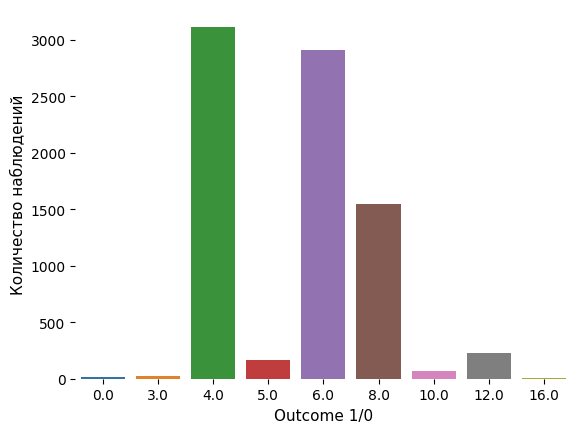

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

target_count = data['Engine Cylinders'].value_counts(dropna=True)
print(target_count)
target_count = data['Engine Cylinders'].value_counts(normalize=True, dropna=True)
print(target_count)

sns.countplot(x='Engine Cylinders', data=data)

plt.box(False)
plt.xlabel('Outcome 1/0',fontsize=11)
plt.ylabel('Количество наблюдений',fontsize=11)
plt.show()

[pandas.DataFrame.sample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)

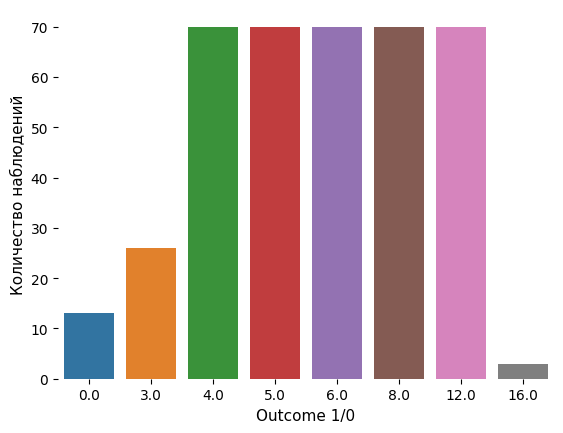

In [6]:
# перемешаем датафрейм
shuffled_df = data.sample(frac=1,random_state=4)

# Поместите весь класс 1 в отдельный набор данных.
CHD_df = shuffled_df.loc[(shuffled_df['Engine Cylinders'] == 3.0)
                         |(shuffled_df['Engine Cylinders'] == 16.0)
                         |(shuffled_df['Engine Cylinders'] == 0.0)]

#Произвольно выберем 492 наблюдения из класса 0 (класс большинства)
data1 = shuffled_df.loc[shuffled_df['Engine Cylinders'] == 4.0].sample(n=70,random_state=42)
data2 = shuffled_df.loc[shuffled_df['Engine Cylinders'] == 6.0].sample(n=70,random_state=42)
data3 = shuffled_df.loc[shuffled_df['Engine Cylinders'] == 8.0].sample(n=70,random_state=42)
data4 = shuffled_df.loc[shuffled_df['Engine Cylinders'] == 12.0].sample(n=70,random_state=42)
data5 = shuffled_df.loc[shuffled_df['Engine Cylinders'] == 5.0].sample(n=70,random_state=42)

# Снова объедините оба фрейма данных
normalized_df = pd.concat([CHD_df,data1,data2,data3,data4,data5])
# print(normalized_df)

# проверить количество новых классов
normalized_df['Engine Cylinders'].value_counts(normalize=True, dropna=True)

sns.countplot(x='Engine Cylinders', data=normalized_df)
plt.box(False)
plt.xlabel('Outcome 1/0',fontsize=11)
plt.ylabel('Количество наблюдений',fontsize=11)
plt.show()

## Андерсэмплинг с использованием Tomek Links:

Один из предоставляемых методов называется «Tomek Links». «Links» в данном случае — пары элементов из разных классов, находящиеся поблизости.

Используя алгоритм мы в конечном итоге удалим элемент пары из большего набора, что позволит классификатору отработать лучше.

![img](https://drive.google.com/uc?id=1he7IP14iTKQrhJ1IHdYBG_d-dMtQLGi4)

In [7]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')
X_res, y_res = tl.fit_resample(X, y)
print(X_res.shape)
print(X.shape)
df_new=pd.concat([X_res, y_res], axis=1)
df_new.shape


ValueError: could not convert string to float: 'BMW'

## Оверсэмплинг:

В SMOTE (Способ Передискретизации Синтезированных Меньшинств) мы создаём элементы в непосредственной близости от уже существующих в меньшем наборе.

![img](https://drive.google.com/uc?id=1joc0QFeiZlrZfuT0kNtT2Kwy5IGgpQ_S)

In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
print(X_sm.shape)
print(X.shape)
df_new_sm=pd.concat([X_sm, y_sm], axis=1)
df_new_sm.shape

sns.countplot(df_new_sm.Outcome, palette="OrRd")
plt.box(False)
plt.xlabel('Outcome 1/0',fontsize=11)
plt.ylabel('Количество наблюдений',fontsize=11)
plt.show()

ValueError: could not convert string to float: 'BMW'

Как мы видим выборка стала сбалансированная. Но в `imblearn` существуют и другие способы андерсэмплинга (Cluster Centroids, NearMiss, и т.д.) и оверсэмплинга (ADASYN и bSMOTE), которые тоже могут пригодиться.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

sampling_strategy = 0.8
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(X, y)
autopct = "%.2f"
ax = y_res.value_counts().plot.pie(autopct=autopct)
_ = ax.set_title("Under-sampling")

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=sampling_strategy)
X_s, y_s = ros.fit_resample(X, y)
ax = y_s.value_counts().plot.pie(autopct=autopct)
_ = ax.set_title("Over-sampling")

In [ ]:
sampling_strategy = "not minority"

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(X, y)
y_res.value_counts().plot.pie(autopct=autopct, ax=axs[0])
axs[0].set_title("Under-sampling")

sampling_strategy = "not majority"
ros = RandomOverSampler(sampling_strategy=sampling_strategy)
X_s, y_s = ros.fit_resample(X, y)
y_s.value_counts().plot.pie(autopct=autopct, ax=axs[1])
_ = axs[1].set_title("Over-sampling")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10), dpi= 80)
mp = sns.heatmap(
    data.corr(numeric_only=True), 
    xticklabels=data.corr(numeric_only=True).columns, 
    yticklabels=data.corr(numeric_only=True).columns, 
    cmap='RdYlGn', 
    center=0, 
    annot=True
)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()